In [100]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy.stats as sps

In [102]:
anaconda_df = sns.load_dataset('anscombe')

In [108]:
anaconda_df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [106]:
anaconda_df.sample(10)

,dataset,x,y
9,I,7.0,4.82
20,II,7.0,7.26
39,IV,8.0,5.25
35,IV,8.0,7.71
23,III,8.0,6.77
34,IV,8.0,5.76
28,III,6.0,6.08
18,II,4.0,3.10
5,I,14.0,9.96
41,IV,8.0,5.56


In [107]:
anaconda_df.isna().sum()

dataset    0
x          0
y          0
dtype: int64

### Описательная статистика 
#### Сразу анализируем датасет

In [8]:
anaconda_df['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [109]:
anaconda_df.groupby('dataset').agg(
    mean_x = ('x', np.mean),
    mean_y = ('y', np.mean),
    std_x = ('x', np.std),
    std_y = ('y', np.std)
)

,mean_x,mean_y,std_x,std_y
dataset,,,,
I,9.0,7.500909,3.316625,2.031568
II,9.0,7.500909,3.316625,2.031657
III,9.0,7.500000,3.316625,2.030424
IV,9.0,7.500909,3.316625,2.030579


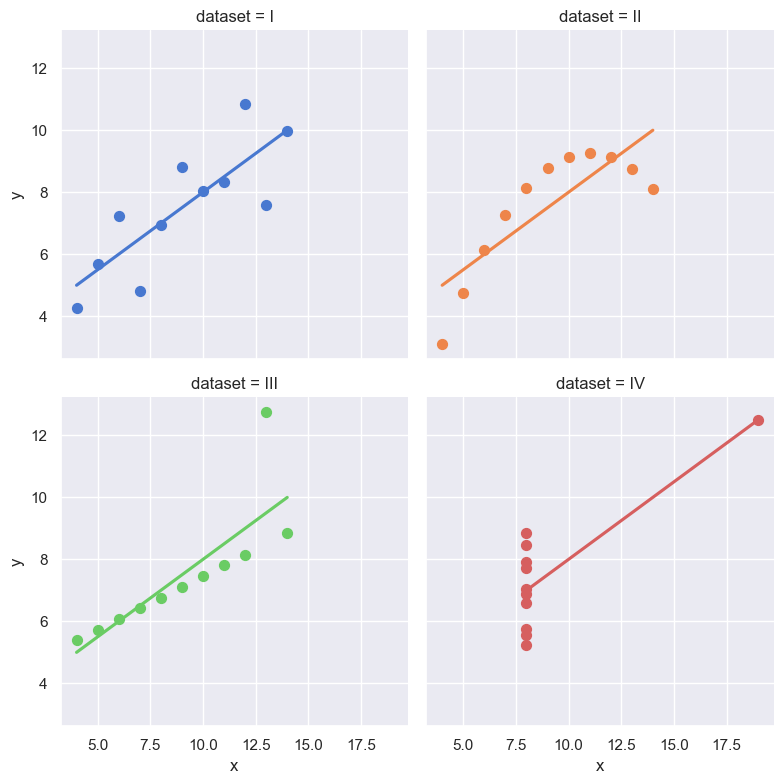

In [110]:
sns.lmplot(
    x = 'x',
    y = 'y',
    col = 'dataset',
    hue = 'dataset',
    data = anaconda_df,
    col_wrap = 2, 
    palette = 'muted',
    height = 4,
    ci = None,
    scatter_kws = {'s': 50, 'alpha': 1}
);

### Выводная статистика
> Основный метод мат статистики **выборочный метод**, его суть состоит в исследование представительной *выборочной совокупности* - для достовереной характеристики генеральной совокупности. 
> Выборочной средней - среднее арифметическое все значений выборки: 
![Выборочной средней](https://poznayka.org/baza1/1360876499472.files/image1035.png)

> Мода: Мода M0 дискретного вариционного ряда - это вариант с максимальной частотой

> Медиана: делит его на две равные части(по количеству вариантов)

> Размех вариации: Это разность между самым большим и самым малым значением статистической совокупности 


### Как проводится исследование 
Обычно из генеральной совокупности извлекается репрезентативная выборка, и на основании изучения выборки делается вывод обо всей совокупности   

### Гипотеза - Нулевая 
> При проверке значимости гипотезу следует формулировать независимо от используемых при ее проверке данных (до проведения проверки). В таком случае можно получить действительно продуктивный результат.
Всегда проверяют нулевую гипотезу (h0), которая отвергает эффект (например, разница средних равняется нулю) в популяции. 

> Например, при сравнении показателей курения у мужчин и женщин в популяции нулевая гипотеза h0 означала бы, что показатели курения одинаковые у женщин и мужчин в популяции.
Затем определяют альтернативную гипотезу (h1), которая принимается, если нулевая гипотеза неверна. Альтернативная гипотеза больше относится к той теории, которую собираются исследовать. Итак, на этом примере альтернативная гипотеза h1 заключается в утверждении, что показатели курения различны у женщин и мужчин в популяции.

> Разницу в показателях курения не уточнили, т.е. не установили, имеют ли в популяции мужчины более высокие или более низкие показатели, чем женщины. Такой подход известен как двусторонний критерий, потому что учитывают любую возможность, он рекомендуется постольку, поскольку редко есть уверенность заранее в направлении какого-либо различия, если таковое существует. 

> В некоторых случаях можно использовать односторонний критерий для гипотезы h1, в котором направление эффекта задано. Его можно применить, например, если рассматривать заболевание, от которого умерли все пациенты, не получившие лечения; новый препарат не мог бы ухудшить положение дел. 
Уровень значимости. Важным этапом проверки статистических гипотез является определение уровня статистической значимости альфа, т.е. максимально допускаемой исследователем вероятности ошибочного отклонения нулевой гипотезы.

### Ошибка первого рода - уровень значимости(обозначается a - альфа)


### Ошибка второго рода - мощность критерия(обозначается  b - бетта)

![](https://theslide.ru/img/thumbs/5096c4934e3b3cbb4cd6e3ad94814a15-800x.jpg)

### Процесс проверки статистических гипотез 
> 1. Обработка выборочных данных и выдвижение основной гипотезы H0 и конкурирующей H1 гипотез

> 2. Выбор статистического критерия K. Это непрерывная случайная величина, принимающие различные действительные значение

> 3. Выбор уровня значимости

> 4. Нахождение критического значения. Критическое значение – пороговое значение статистики, которое ожидается в случае, если нулевая гипотеза верна. Критическое значение статистики отделяет область типичных значений статистики от критической области – области редких значений статистики при условии, что нулевая гипотеза верна. Область типичных значений – область не-отвержения ну- левой гипотезы, критическая область – область отвержения нулевой гипотезы. Вид критической области зависит от типа альтернативной гипотезы.
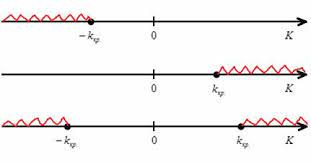

> 5. После на основание выборочных данных рассчитывается наблюдаемое значение критерия(или вердикт)

### Проверка на нормальность D'Agostine-Pearson normality test

[Tutorial](https://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/dagostino-pearson-test/)

NormaltestResult(statistic=662.6625956575386, pvalue=1.272464488749829e-144)

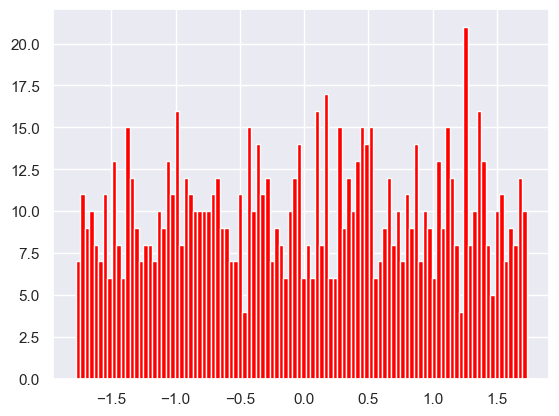

In [118]:
sample = np.random.random_sample(1000)
sample = (sample - np.mean(sample)) / np.std(sample) # нормализация, центрировать вокруг нуля
plt.hist(sample, bins = 100, color = 'red')
sps.normaltest(sample)

P value is 0.7566317014802156


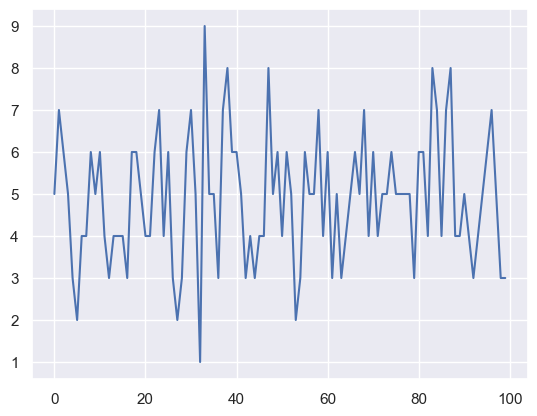

0.5577573354800052


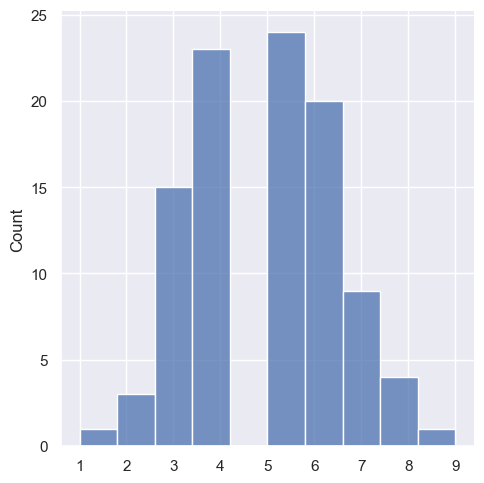

In [187]:
sample = sps.binom(10, .5).rvs(size = 100)
stat, p = sps.normaltest(sample)
print(f'P value is {p}') # чем меньше p-уровень тем больше оснований отвергнуть нулевую гипотезу
plt.plot(sample)
plt.show()
print(stat)
sns.displot(data = sample);

p-value 0.08773040497908056


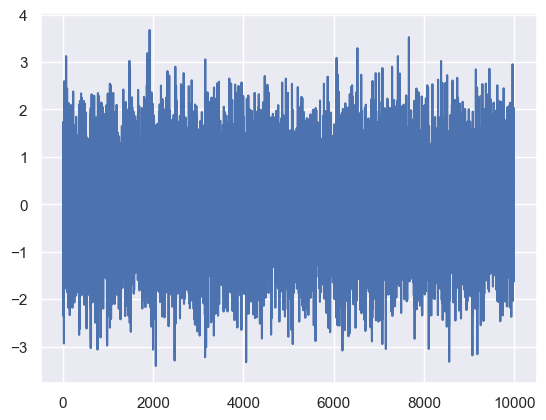

4.866973493308314


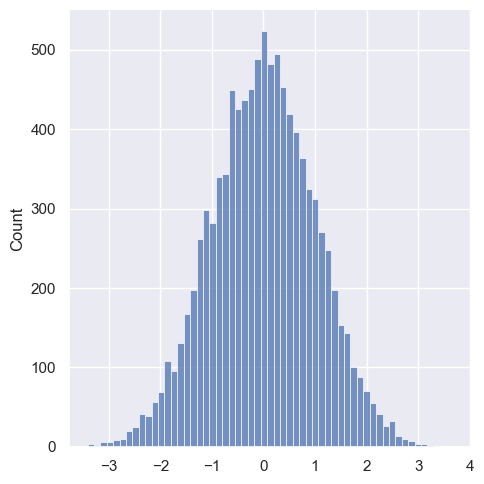

In [170]:
sample = sps.norm.rvs(size = 10000)
stat, p = sps.normaltest(sample)
print(f'p-value {p}')  # чем меньше p-уровень тем больше оснований отвергнуть нулевую гипотезу
plt.plot(sample)
plt.show()
print(stat)
sns.displot(sample);

### Критерий Шапиро-Уилка
> Критерий Шапиро-Уилка используется для проверки гипотезы H_0: «случайная величина X распределена нормально» и является одним наиболее эффективных критериев проверки нормальности. Критерии, проверяющие нормальность выборки, являются частным случаем критериев согласия. Если выборка нормальна, можно далее применять мощные параметрические критерии, например, критерий Фишера.

p-value 0.3570370078086853
0.9981616139411926


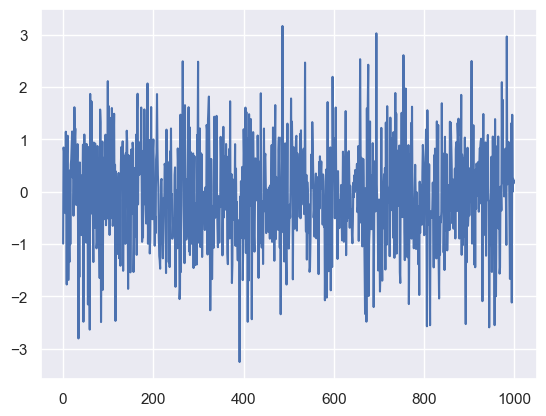

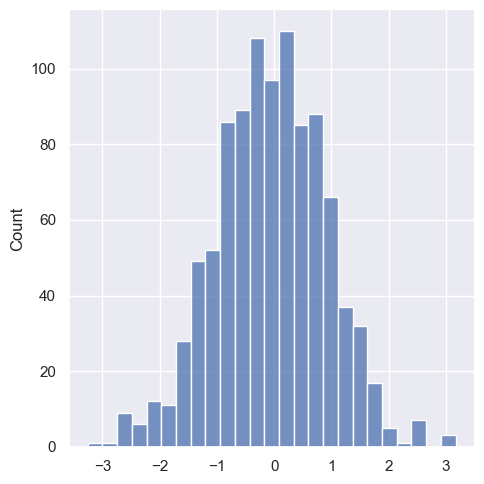

In [186]:
sample = sps.norm.rvs(size = 1000)
stat, p = sps.shapiro(sample)

print(f'p-value {p}')
plt.plot(sample)
print(stat)
sns.displot(sample);
plt.show()

p-value 0.2847507894039154


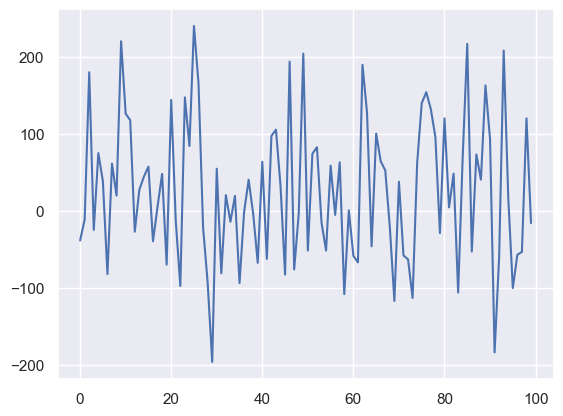

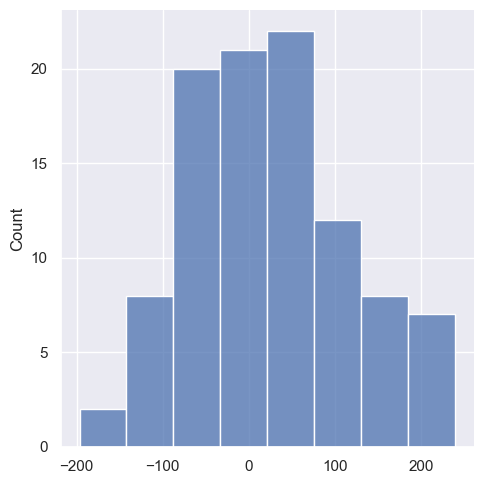

In [188]:
sample = sps.norm(loc = 20, scale = 100).rvs(size = 100)
stat, p = sps.shapiro(sample)
print(f'p-value {p}')
plt.plot(sample)
sns.displot(sample)
plt.show()

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value 0.0


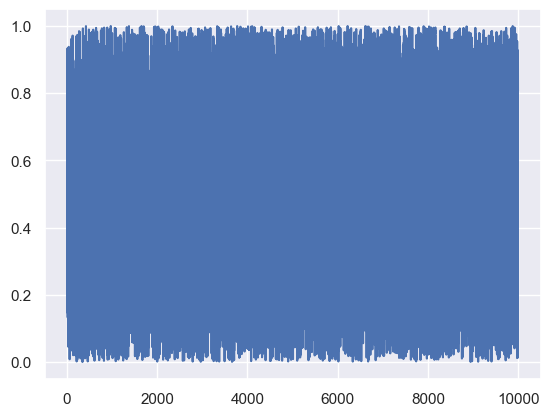

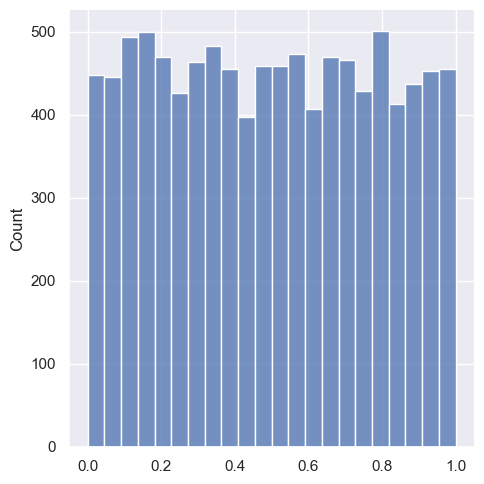

In [194]:
sample = sps.uniform.rvs(size = 10000)
stat, p = sps.shapiro(sample)
print(f'p-value {p}') # отвергаем нулевую гипотезу
plt.plot(sample)
sns.displot(sample)
plt.show()

Stat = 0.7956169247627258, p-value = 1.8202554741275634e-10
Probably NOT Gaussin


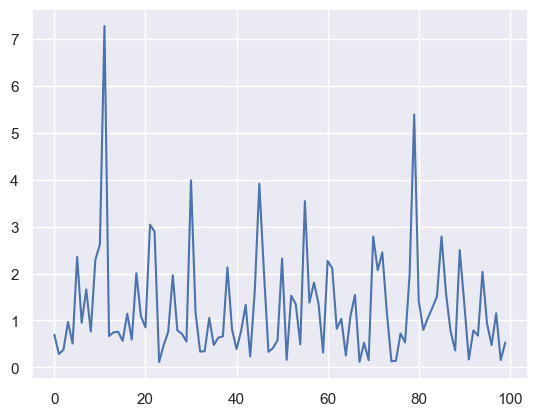

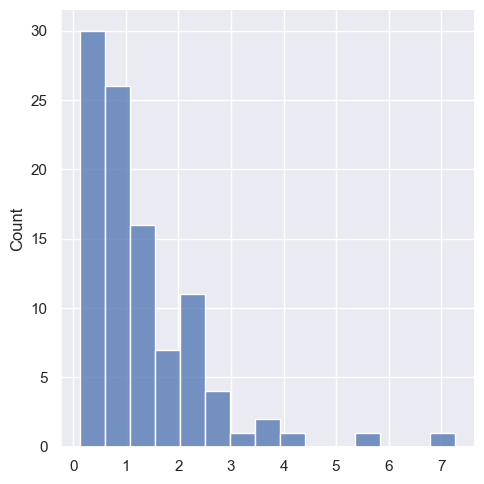

In [202]:
sample2 = sps.powerlognorm.rvs(c = 1, s = 1, size = 100)
stat, p = sps.shapiro(sample2)
print(f'Stat = {stat}, p-value = {p}')
if p > 0.05:
    print('Probably Gaussin')
else:
    print('Probably NOT Gaussin')
plt.plot(sample2)
sns.displot(sample2)
plt.show()

### Критерий согласия Колмогорова 


p-value 4.620745345143083e-05


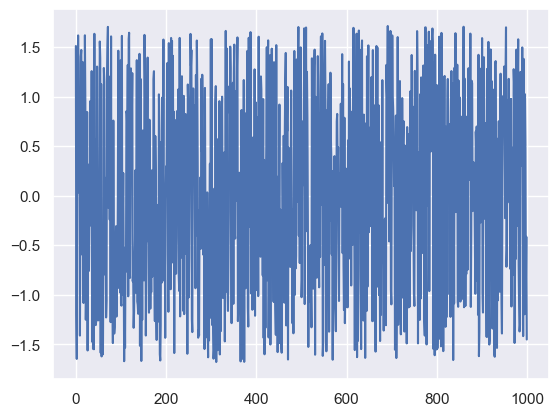

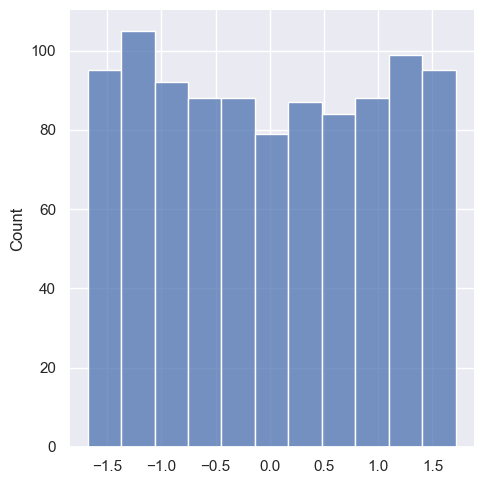

In [88]:
sample = np.random.random_sample(1000)
sample = (sample - np.mean(sample)) / np.std(sample)
stat, p = sps.kstest(sample, cdf = sps.norm.cdf)

print(f'p-value {p}')
plt.plot(sample)
sns.displot(sample)
plt.show()